In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import warnings 
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("cust_seg.csv", index_col=0)

In [3]:
df.head(10)

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,6.3
1,2,47,1,26,100,4.582,8.218,0.0,12.8
2,3,33,2,10,57,6.111,5.802,1.0,20.9
3,4,29,2,4,19,0.681,0.516,0.0,6.3
4,5,47,1,31,253,9.308,8.908,0.0,7.2
5,6,40,1,23,81,0.998,7.831,NaN,10.9
6,7,38,2,4,56,0.442,0.454,0.0,1.6
7,8,42,3,0,64,0.279,3.945,0.0,6.6
8,9,26,1,5,18,0.575,2.215,NaN,15.5
9,10,47,3,23,115,0.653,3.947,0.0,4.0


In [4]:
df["Defaulted"].value_counts()

0.0    517
1.0    183
Name: Defaulted, dtype: int64

In [5]:
df["Defaulted"] = df["Defaulted"].fillna(0)
df["Defaulted"].isna().sum()

0

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 850 entries, 0 to 849
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Customer Id      850 non-null    int64  
 1   Age              850 non-null    int64  
 2   Edu              850 non-null    int64  
 3   Years Employed   850 non-null    int64  
 4   Income           850 non-null    int64  
 5   Card Debt        850 non-null    float64
 6   Other Debt       850 non-null    float64
 7   Defaulted        850 non-null    float64
 8   DebtIncomeRatio  850 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 66.4 KB


In [7]:
scaler = StandardScaler() # Instantiates the Transformer
scaled_df = scaler.fit_transform(df)

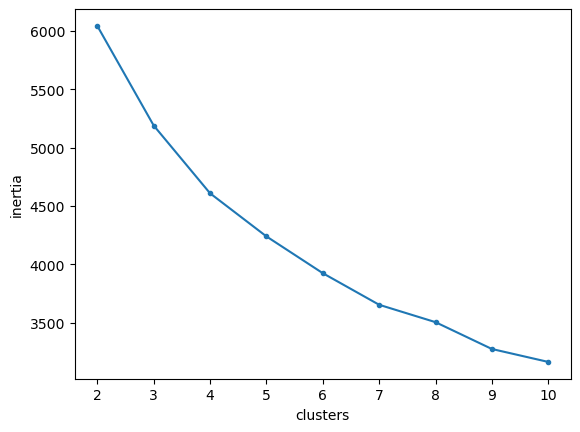

In [8]:
inertias = []

for k in range(2,11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(scaled_df)
    inertias.append(kmeans.inertia_)
    
plt.plot(range(2,11), inertias, marker = ".")
plt.xlabel("clusters")
plt.ylabel("inertia");

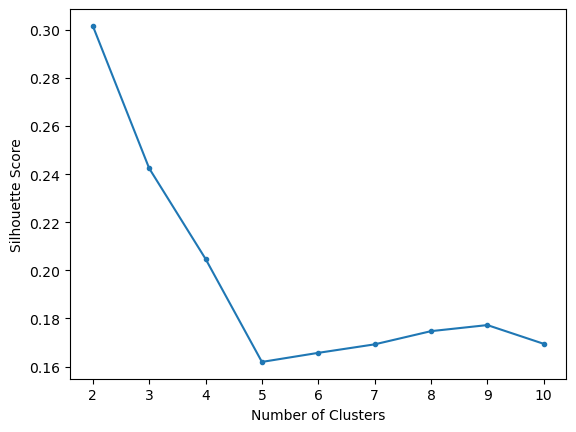

In [9]:
silhouette_scores = []
for i in range(2,11):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(scaled_df)
    silhouette_scores.append(silhouette_score(scaled_df,
kmeans.labels_))
    
plt.plot(range(2,11), silhouette_scores, marker = ".")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score");

In [10]:
kmeans = KMeans(n_clusters = 2)
kmeans.fit(scaled_df)
silhouette_score(scaled_df, kmeans.labels_)

0.30163893197453284

# I will employ 3 clusters based on the results of my cluster data models. 

In [11]:
kmeans3 = KMeans(n_clusters = 3)
kmeans3.fit(scaled_df)

KMeans(n_clusters=3)

In [12]:
df["cluster"] = kmeans3.labels_
df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio,cluster
0,1,41,2,6,19,0.124,1.073,0.0,6.3,0
1,2,47,1,26,100,4.582,8.218,0.0,12.8,1
2,3,33,2,10,57,6.111,5.802,1.0,20.9,2
3,4,29,2,4,19,0.681,0.516,0.0,6.3,0
4,5,47,1,31,253,9.308,8.908,0.0,7.2,1


In [13]:
df = df.drop(["Customer Id"], axis=1) # Dropping this Customer ID column as 
# all features in this column are unique and offer no analytical value.

In [14]:
cluster_groups = df.groupby("cluster", as_index=False).mean()
cluster_groups

,cluster,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,0,33.817505,1.603352,7.625698,36.143389,0.853128,1.816855,0.000000,7.964991
1,1,43.000000,1.931973,17.197279,101.959184,4.220673,7.954483,0.129252,13.915646
2,2,31.891566,1.861446,3.963855,31.789157,1.576675,2.843355,0.987952,13.994578


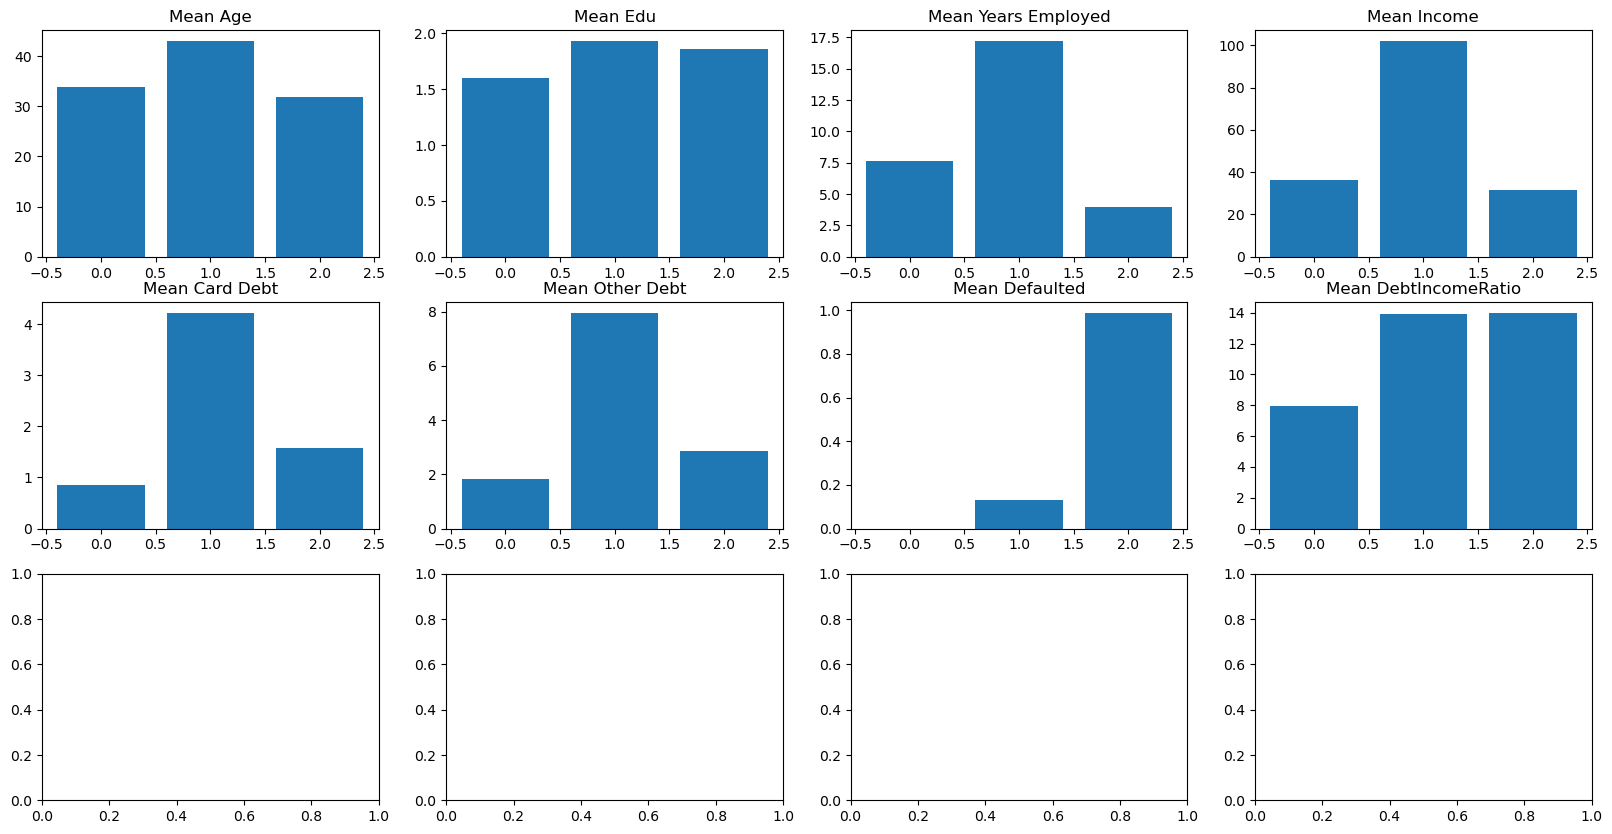

In [15]:
fig, axes = plt.subplots(3,4, figsize = (20,10))

axes = axes.ravel()

for i, col in enumerate(cluster_groups.columns[1:]):
    axes[i].bar(cluster_groups["cluster"], cluster_groups[col])
    axes[i].set_title(f"Mean {col}")

## In Cluster 0: I see the higher mean age and higher mean education as well as higher mean years employed along with highest mean income and mean card and other debt. This cluster appears to have the most access to capital, education and potentially health-care resources and resources in general. This group interestingly has the second lowest defaulted rate. This could mean that there is the potential for this group to be handle taking on more financially without a high rate of default. 


## In Cluster 1 I see a correlation of a lower mean age but still a strong education but a high default and debt to income ratio coupled with a disturbingly lower mean years employed. This group may be lacking the same previous generation desire to stay employed with the same employer for as long as the older cluster has. This would definitely create longer term impact coupled with the realization that this clusters has the highest defaulted mean of all 3 clusters. 

## Cluster 2 has the healthiest debt profile of any of the groups. With lower mean income , but the lowest levels of card debt, other debt and defaults, this group might not be in a position to access capital and resources as easily as the other groups. This group, given their age and lower income and resources might be a group particularly in need of help and ease of access to opportunities.  

# Recommendations for the Credit Card Company Client: I would recommend Cluster 0 to target heavily primarily. They have high incomes and resources with a low default rate and can represent a strong lifetime value as a client above and beyond the other clusters. I would then recommend targeting Cluster 1. Cluster 1 has less reliable access to resources and the highest default rate. I would recommend careful risk assessment with this group and limiting company exposure due to their default rate. If Cluster 3 is targeted, they don't carry any default and overall lower levels of credit utilization than the other groups. This could make them an attractive group to market to but that depends on the main income sources of the Client enterprise. If it is heavily fee related then ignore this group, they are timely and will not default and trigger any overage related fees. 